<a href="https://colab.research.google.com/github/jiwoo0524/2/blob/main/py2023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!! At first, you may need to activate your virtual environment for this Python seminar !!


# \<Table of contents\>
Today, we will learn how we can draw figures by Matplotlib.  

> 1. Line plot  
>     1.1 Simple line plot  
>     1.2 Plot with un uncertainy range
> 2. Scatter plot
> 3. Bar chart
> 4. Histogram
> 5. Map  
>     5.1 imshow  
>     5.2 Cartopy  
> 6. Multiple axes in a figure
>     6.1 add_subplot and subplots  
>     6.2 Gridspec  
    
[Appendix] Gallary
- Basemap
- Hydro Hyeto Graph
- Land cover classification  
  
  
(Links)
- [*matplotlib web-page main*](https://matplotlib.org/)  
 - [plot types](https://matplotlib.org/stable/plot_types/index.html)  
 - [gallery](https://matplotlib.org/stable/gallery/index.html)  
 - [cheatsheet](https://matplotlib.org/cheatsheets/)  


# \(Env. set-up\)

```bash
# Create your vertual env
conda create -n py_seminar  # create a vertual env
conda info -e               # make sure that you made the env
conda activate py_seminar   # activate your vertual env
# Install libraires
conda install numpy
conda install matplotlib
conda install netcdf4
conda install cartopy
conda install pandas        # we don't use this today
conda install xarray        # we don't use this today
```

 ### Env. set-up (optional)
 <You can install cartopy and basemap in a environment. However, you need to downgrade the version of cartopy.>
 - Note that there are 2 different environments required for running this notebook
 - One is for "cartopy" and the other is for "basemap"
 - Please switch to the approporate enviroment in running the each cell

```bash
# Create env.1 (optional)
conda create -n pytest1 python=3.9 -y
# Install libraires
conda install numpy -y
conda install matplotlib -y
conda install -c anaconda netcdf4  -y
conda install -c conda-forge cartopy -y
# ---------------------------
# Create env.2 (optional)
conda create -n pytest2 python=3.9 -y
# Install libraires
conda install numpy -y
conda install matplotlib -y
conda install -c conda-forge basemap -y
conda install jupyter -y
```

# (Before you start...)    Comment lines in Python
Comments are very important for readability. It can be used to
- explain Python code.
- make the code more readable.
- prevent execution when testing code.

In [5]:
# Comment lines starts with a "#", and Python will ignore the line.
# print('Hello, World. This is a comment line.')
print('Hello, World. This is not a comment line')  # Comments can be placed at the end of a line, too, like this.

Hello, World. This is not a comment line


In [ ]:
# A comment does not have to be text that explains the code, it can also be used to prevent Python from executing code

#print("Hello, World!")
print("Cheers, Mate!")

Cheers, Mate!


In [ ]:
"""
This is multiline comments.
You can make a comment block using triple quates.
Hallo, World!!
"""

'\nThis is multiline comments.\nYou can make a comment block using triple quates.\nHallo, World!!\n'

# Import libraries

 ## - NumPy
NumPy (Numerical Python) is a fundamental package for scientific computing with Python. Numpy enables powerful N-dimensional arrays and provides various numerical computing function/tools.

 ## - matplotlib.pyplot
We use [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html), which is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Line Plots <a class="anchor" id="first-bullet"></a>

## 1.1 Simple Line Plots <a class="anchor" id="1-bullet"></a>
> [plot(\[x\], y, *args, **kwargs)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

**Note:**  
Two drawing style when plotting  
 - **plt**.plot(): **EASY&HANDY!** I often use this style in interactively drawing.
 - **ax**.plot() : **MORE OPTIONS** (including subplots). I prefer this style, in particular, when I draw a (customized) figure with script.

In [ ]:
# Create Sample Data
pi = np.pi  # 3.1415...
x = np.linspace(0, 6*pi, 100)  # x values   <-- splitting 0~6*pi into 100
y = np.cos(x)  # calc cosx

### **Style1:** plt.plot()

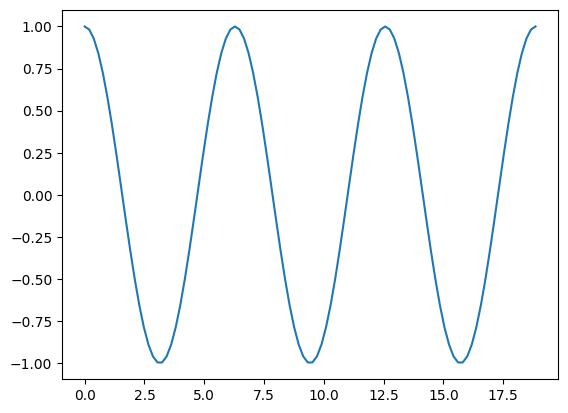

In [ ]:
# Draw cos curve (the simplest way).
plt.plot(x, y)        # plot x and y using default line style and color
#plt.plot(x, y, 'bo')  # plot x and y using blue circle markers
#plt.plot(y)           # plot y using x as index array 0..N-1
#plt.plot(y, 'r+')     # ditto, but with red plusses

# Make your plot cooler!
#plt.xlim(0,9)
#plt.ylim(-1.0,1.0)
#plt.grid()
#plt.title('Cosine Line')
#plt.xlabel('X label')
#plt.ylabel('Y label')

### **Style2:** ax.plot()

[What is fig, ax?](https://matplotlib.org/1.5.1/faq/usage_faq.html)


<img src='https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png'>

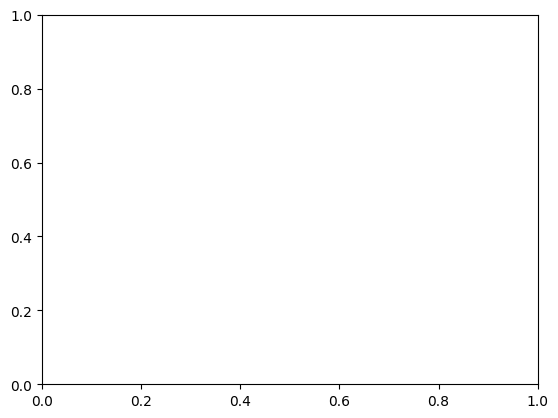

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

Text(0, 0.5, 'Y label')

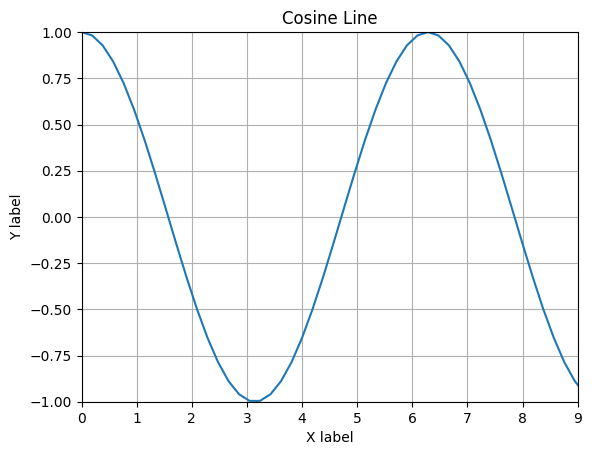

In [ ]:
# Define figure and ax
fig = plt.figure()
ax = fig.add_subplot(111)
#fig, ax = plt.subplots()  # You can do like this too.

ax.plot(x, y)
ax.set_xlim(0,9)
ax.set_ylim(-1.0,1.0)
ax.grid()
ax.set_title('Cosine Line')
ax.set_xlabel('X label')
ax.set_ylabel('Y label')

Too simple? Let's double the lines then.

Text(0.5, 1.0, 'Cosine and Sine Lines')

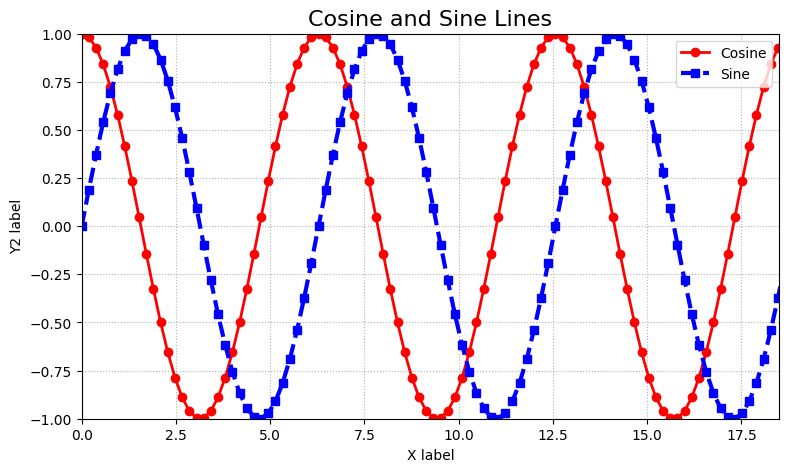

In [ ]:
pi = np.pi # 3.1415...
x = np.linspace(0, 6*pi, 100) # x values
y = np.cos(x) # calc cosx
y2 = np.sin(x) # calc sinx

#Initial axis
figsize = (9,5)
fig = plt.figure(figsize=figsize)            # figsize=(width, height)   default: (6.4, 4.8) inch
ax1 = fig.add_subplot(111)
#fig, ax1 = plt.subplots(figsize=figsize
ax1.plot(x, y, label='Cosine', color='red', linestyle='-', marker='o', linewidth=2.0)
ax1.plot(x, y2, label='Sine', color='blue', linestyle='--', marker='s',linewidth=3.0)
ax1.set_ylim(-1.0,1.0)
ax1.set_xlim(0,18.5)

ax1.legend()
ax1.grid(linestyle='dotted')

# Labels
ax1.set_ylabel('Y1 label')
ax1.set_ylabel('Y2 label')
ax1.set_xlabel('X label')

plt.title('Cosine and Sine Lines', fontsize=16)


### Secondary Axis*  <a class="anchor" id="2-bullet"></a>

We will then add secondary axis.  
FYI: [color](https://www.rapidtables.com/web/color/RGB_Color.html)

Text(0.5, 1.0, 'Cosine and Sine Lines')

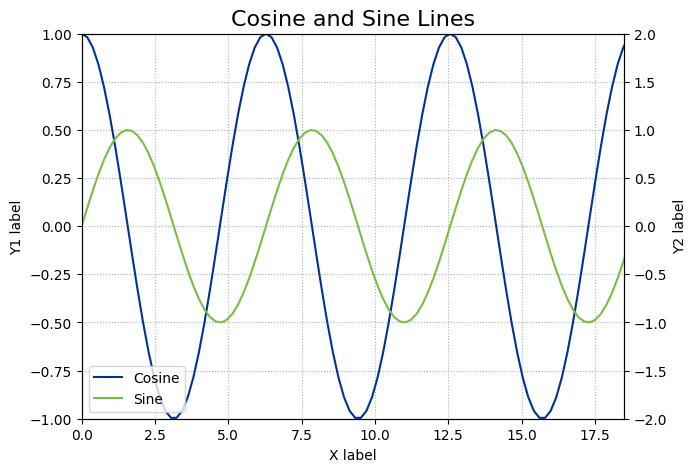

In [ ]:
#Initial axis
fig, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(x, y, label='Cosine', color='#003296')
ax1.set_ylim(-1.0,1.0)

#Secondary axis
ax2 = ax1.twinx()               # <---- this is the point!
ax2.plot(x, y2, label='Sine', color='#78be46')
ax2.set_xlim(0,18.5)
ax2.set_ylim(-2.0,2.0)

ax1.grid(linestyle='dotted')

#Extract legend from line plots
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

#Plot x, y1 and y2 labels
ax1.set_ylabel('Y1 label')
ax2.set_ylabel('Y2 label')
ax1.set_xlabel('X label')

plt.title('Cosine and Sine Lines', fontsize=16)

## 1.2 Plots with un uncertainty range
> [*full_between(x, y1, y2, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html)

[(0.0, 8.0),
 (0.0, 8.0),

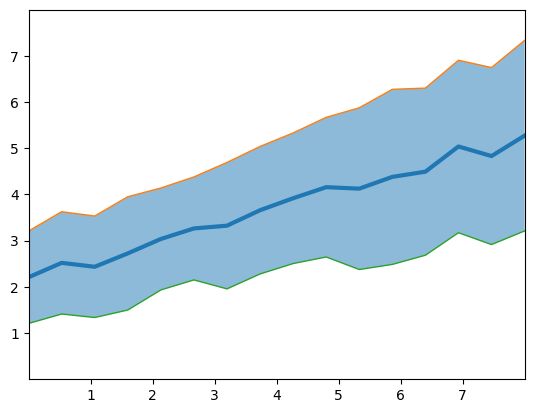

In [ ]:
# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))
y = (y1 + y2)/2

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, y, linewidth=3)
ax.plot(x, y1, linewidth=1)
ax.plot(x, y2, linewidth=1)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

# 2. Scatter Plot <a class="anchor" id="fourth-bullet"></a>
Let's try a scatter plot.
> [*scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

(0.0, 1.0)

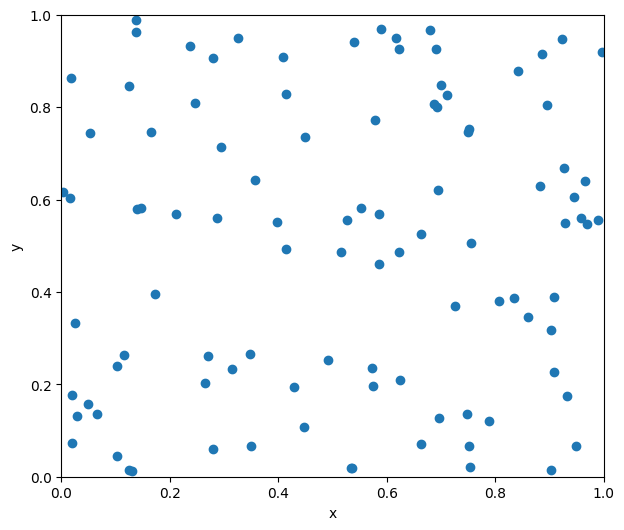

In [ ]:
# make data
n_sample = 100
x = np.random.rand(n_sample)     # random number generation
y = np.random.rand(n_sample)
value = np.random.rand(n_sample)

fig, ax = plt.subplots(figsize=(7,6))

im = ax.scatter(x, y)
#im = ax.scatter(x, y, s=100, c=value, cmap='rainbow')   # We can color a scatterplot by value.
#cbar = fig.colorbar(im, ax=ax, aspect=30, pad=0.01, orientation='vertical', extend='neither')
#cbar.set_label('value')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)


Let's see what changes. We can give the plot color :)

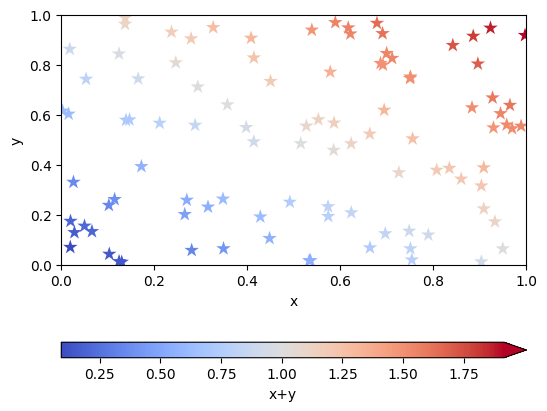

In [ ]:
# make data
c = x + y # coloring rule

fig, ax = plt.subplots(figsize=(6,5))      # note: figsize is for the size of the fiture, not for axes.

im = ax.scatter(x, y, s=120, linewidth=0.0, edgecolor='k', marker='*', c=c, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

cbar = fig.colorbar(im, ax=ax, aspect=30, pad=0.2, orientation='horizontal', extend='max')
cbar.set_label('x+y')

- [Some others filled markers](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle)  
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

- [matplotlib coloar maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


# 3. Bar Chart <a class="anchor" id="5-bullet"></a>
> [*bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Text(0, 0.5, 'Height')

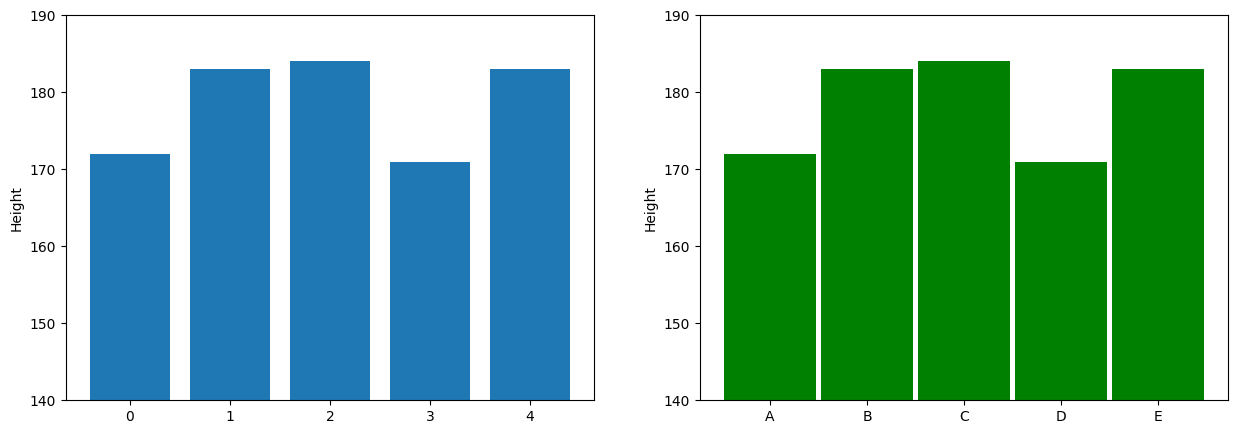

In [ ]:
# make data
height_min, height_max = 140, 190
names = ['A', 'B', 'C', 'D', 'E']
height = np.random.randint(height_min, height_max, 5)
x = range(len(names))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(x, height)
ax1.set_ylim([height_min, height_max])
ax1.set_ylabel('Height')
ax2.bar(x, height, tick_label=names, color='green', width=0.95)
ax2.set_ylim([height_min, height_max])
ax2.set_ylabel('Height')

# 4. Histogram <a class="anchor" id="5-bullet"></a>
> [*hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

Text(0, 0.5, 'Probability')

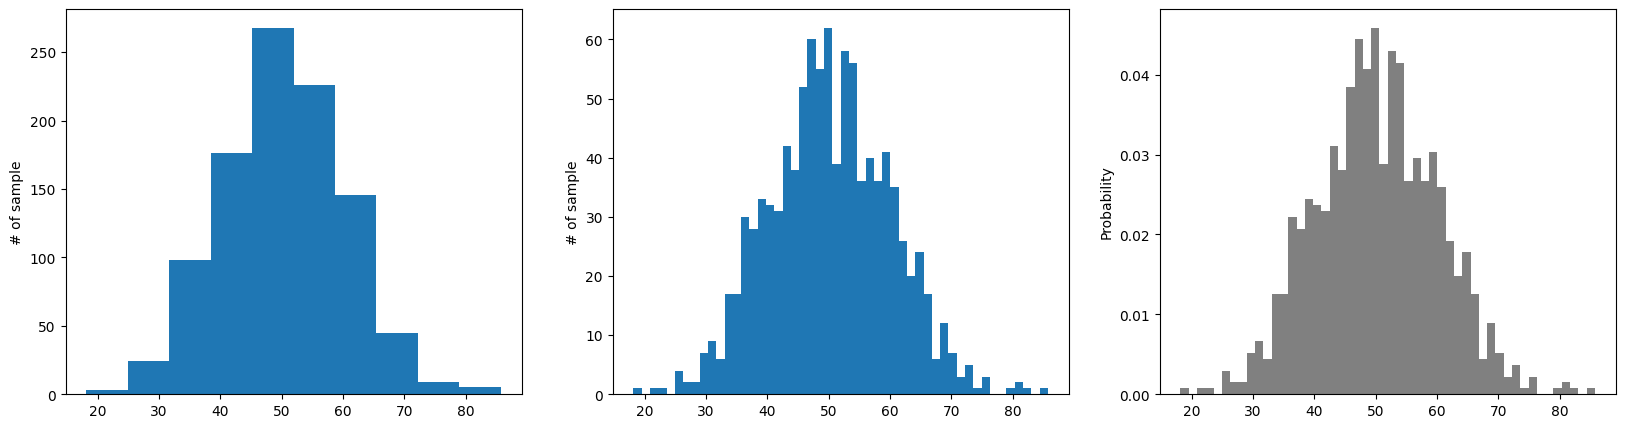

In [ ]:
# make data
x = np.random.normal(50, 10, 1000)   # ramdom number generation from a normal distribution (mean 50, standard deviation 10, sample size=1000)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

# histogram
ax1.hist(x)
ax1.set_ylabel('# of sample')

ax2.hist(x, bins=50)
ax2.set_ylabel('# of sample')

ax3.hist(x, bins=50, density=True, color='gray')
ax3.set_ylabel('Probability')

Do you see the difference?

# 5. Map <a class="anchor" id="6-bullet"></a>

First we will cover imshow, followed by a mapping tool:Cartopy.

## 5.1 Imshow
> [*imshow(src, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

(Caution!!) Depending on the data structure, the plot could be upside down.

In [9]:
pip install netCDF4

In [11]:
from netCDF4 import Dataset
import os

# loading a temperature data
current_dir = os.getcwd()
print(current_dir)
#file_path = os.path.join(current_dir, 'lec2-5_read.nc')

nc = Dataset('lec2-5_read.nc', 'r') # open a NetCDF file
print('variables in nc file:',nc.variables.keys())
print('unit of longitude:',nc.variables['lon'].units)
print('unit of latitude: ',nc.variables['lat'].units, '(<--- South edge is first, North edge is last => UPSIDE DOWN !!!)')
Tair = nc.variables['Tair'][0]      # Air temperature (0: choose only 1st time step)
print('Tair.shape:', Tair.shape)
nc.close()

# Visualization
fig, ax = plt.subplots()
ax.imshow(Tair) # Upside down
ax.set_title('Upside down')

/content


FileNotFoundError: ignored

In [ ]:
from netCDF4 import Dataset

# loading a temperature data
nc = Dataset('lec2-5_read.nc', 'r') # open a NetCDF file
print('variables in nc file:',nc.variables.keys())
print('unit of longitude:',nc.variables['lon'].units)
print('unit of latitude: ',nc.variables['lat'].units, '(<--- South edge is first, North edge is last => UPSIDE DOWN !!!)')
Tair = nc.variables['Tair'][0]      # Air temperature (0: choose only 1st time step)
print('Tair.shape:', Tair.shape)
nc.close()

# Visualization
fig, ax = plt.subplots()
ax.imshow(Tair) # Upside down
ax.set_title('Upside down')

FileNotFoundError: ignored

To plot it in a right way...

NameError: ignored

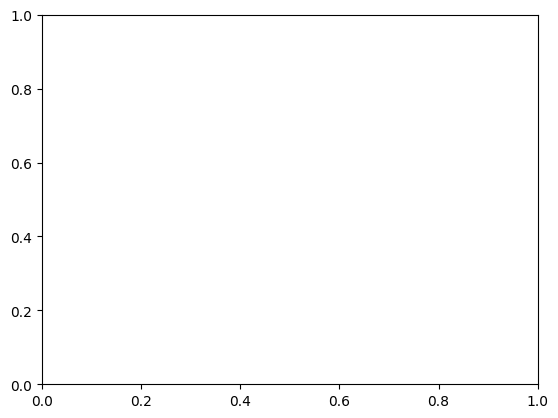

In [ ]:
fig, ax = plt.subplots()
ax.imshow(Tair, origin='lower')    # origin='lower' (default is 'upper')
#ax.imshow(np.flipud(Tair))        # <--- This works, too.
#ax.imshow(Tair[::-1])             # <--- This also works.
ax.set_title("set option origin='lower'")

Remove axes ticks and add colorbar

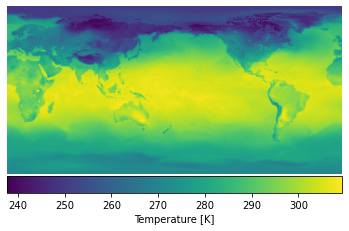

In [ ]:
fig, ax = plt.subplots()
ax.axis(False)                          # <--- This is the point!!
im = ax.imshow(Tair, origin='lower')    # origin='lower' (default is 'upper')
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Temperature [K]')

To change a color map...  
[other coloar maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

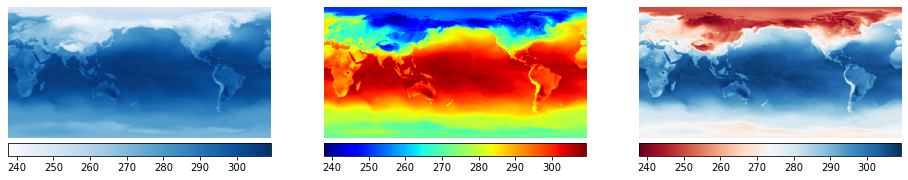

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(16,8))

# cmap='Blues'
ax = axs[0]
ax.axis(False)
im = ax.imshow(Tair, origin='lower', cmap='Blues')
fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.01)

# cmap='jet'
ax = axs[1]
ax.axis(False)
im = ax.imshow(Tair, origin='lower', cmap='jet')
fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.01)

# cmap='RdBu'
ax = axs[2]
ax.axis(False)
im = ax.imshow(Tair, origin='lower', cmap='RdBu')
fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.01)

FYI: If you would like to draw a vertical colorbar that fits a map...

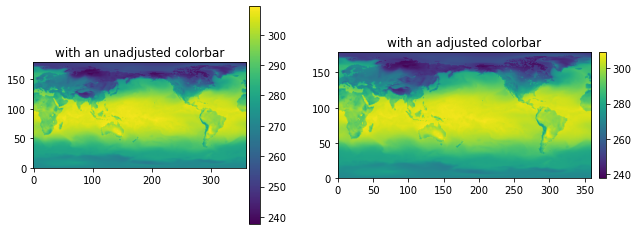

In [ ]:
# Adjusting a vertical colorbar...
fig, axs = plt.subplots(1,2, figsize=(10, 4))

ax1 = axs[0]
ax1.set_title('with an unadjusted colorbar')
im = ax1.imshow(Tair, origin='lower')
fig.colorbar(im, ax=ax1, orientation='vertical', pad=0.01)    # This looks bad...

ax2 = axs[1]
ax2.set_title('with an adjusted colorbar')
im = ax2.imshow(Tair, origin='lower')
ax_pos = ax2.get_position()
cax = fig.add_axes([ax_pos.x1+0.01, ax_pos.y0, 0.01, ax_pos.y1-ax_pos.y0])
cbar = fig.colorbar(im, cax=cax)                              # This looks good :)

When some values are missing (e.g. ocean), you can mask them using one of these numpy.ma functions:
- masked_where
- masked_equal
- masked_less_equal
- masked_greater_equal
- masked_less
- masked_greater
- (masked_array)

https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_where.html  
We will lean this in the 4th lecture.

## 5.2 Cartopy

## [Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) vs [Basemap](https://basemaptutorial.readthedocs.io/en/latest/)?

Both Cartopy and Basemap are common packages for creating maps in Python. As Basemap will be replaced with Cartopy in the near future, new Python learners are recommended to learn Cartopy.

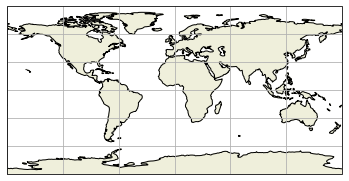

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([80, 170, -45, 30])   # example
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.gridlines()

Many methods in cartopy
- [projection list](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html)
- [add_feature](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html)

### Plot data on map with Cartopy
Here we will create a map and plot some data on it.  
We don't cover in detail. Please refer to the following for further information.  
- [Cartopy (EN)](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html)  
- [Cartopy (JP)](http://ebcrpa.jamstec.go.jp/~yyousuke/matplotlib/matplotlib-7.pdf)  
- [Basemap (EN)](https://matplotlib.org/basemap/users/examples.html)

Text(0.5, 1.0, 'surface upward long radiation [W/m2]')

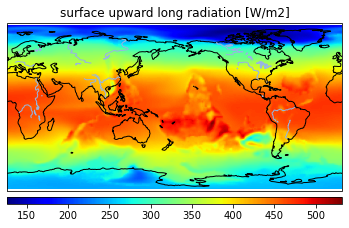

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Prepare data
nx, ny = 256, 128                                                ## the shape of the binary file
rlus = np.fromfile('rlus.bin', dtype='float64').reshape(ny,nx)   ## Read file

west, east, south, north = 0, 360, -90, 90
lons = np.linspace( west+180./nx, east-180./nx, nx)
lats = np.linspace( south+90./ny, north-90./ny, ny)

# Show the map
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
#ax.add_feature(cfeature.LAND)
#ax.gridlines()

# Show the data
#im = ax.contourf(lons, lats, rlus, transform=ccrs.PlateCarree(), cmap='jet')
im = ax.imshow(rlus, transform=ccrs.PlateCarree(), cmap='jet')

# coastline
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

# figur decoration
plt.colorbar(im, aspect=50, pad=0.03, orientation='horizontal')
ax.set_title('surface upward long radiation [W/m2]')

# 6. Multiple axes in a figure
Before moving to Map, one more!  
You can create several subplots in a single figure. (= a figure can store multiple axes(es))  

### 6.1 add_subplot and subplots <a class="anchor" id="second-bullet"></a>  

Text(0.5, 0.5, '6')

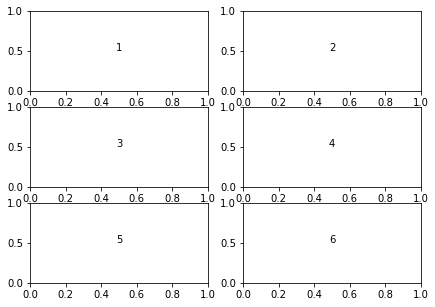

In [ ]:
row, col = 3, 2
fig = plt.figure(figsize=(7, 5))

ax1 = fig.add_subplot(row, col, 1)
ax1.text(0.5, 0.5, 1, ha='center', transform=ax1.transAxes)

ax2 = fig.add_subplot(row, col, 2)
ax2.text(0.5, 0.5, 2, ha='center', transform=ax2.transAxes)

ax3 = fig.add_subplot(row, col, 3)
ax3.text(0.5, 0.5, 3, ha='center', transform=ax3.transAxes)

ax4 = fig.add_subplot(row, col, 4)
ax4.text(0.5, 0.5, 4, ha='center', transform=ax4.transAxes)

ax5 = fig.add_subplot(row, col, 5)
ax5.text(0.5, 0.5, 5, ha='center', transform=ax5.transAxes)

ax6 = fig.add_subplot(row, col, 6)
ax6.text(0.5, 0.5, 6, ha='center', transform=ax6.transAxes)

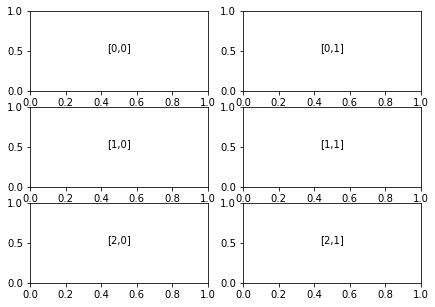

In [ ]:
row, col = 3, 2
fig, axs = plt.subplots(row, col, figsize=(7,5))

from itertools import product
for irow, icol in product(range(row), range(col)):
    ax = axs[irow, icol]
    ax.text(0.5, 0.5, f'[{irow},{icol}]', ha='center', transform=ax.transAxes)

'\nfor x in range(2):\n    for y in range(2):\n        axs[x, y].set_xticks([])\n        axs[x, y].set_yticks([])\n'

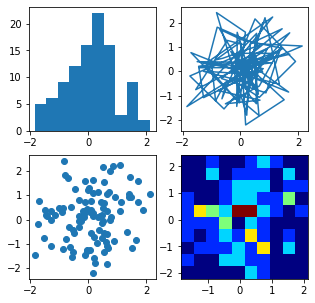

In [ ]:
data = np.random.randn(2, 100)     # random number generation

row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(5, 5))

axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1], cmap='jet')

#To remove x and y ticks and adjust the space between subplots
"""
for x in range(2):
    for y in range(2):
        axs[x, y].set_xticks([])
        axs[x, y].set_yticks([])
"""

#plt.subplots_adjust(wspace=0.02, hspace=0.02)

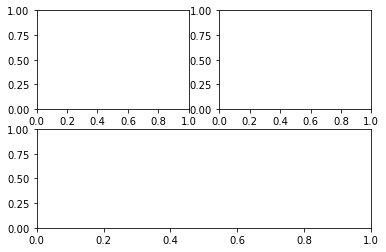

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 1, 2)

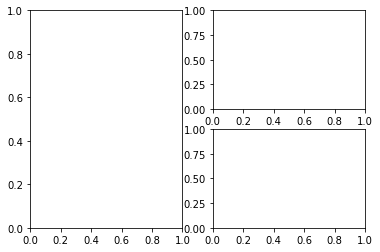

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

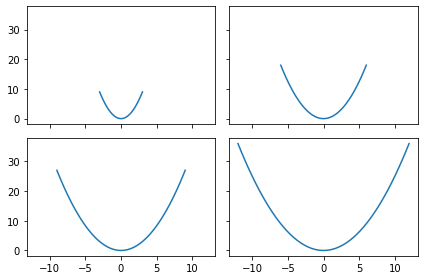

In [ ]:
# --- Share axes

# make data
x = np.linspace(-3,3)
y = x**2

#fig, axes = plt.subplots(2, 2, tight_layout=True)
#fig, axes = plt.subplots(2, 2, tight_layout=True, sharex='all')
#fig, axes = plt.subplots(2, 2, tight_layout=True, sharey='all')
fig, axes = plt.subplots(2, 2, tight_layout=True, sharex='all', sharey='all')

axes[0,0].plot(x, y)
axes[0,1].plot(2*x, 2*y)
axes[1,0].plot(3*x, 3*y)
axes[1,1].plot(4*x, 4*y)


### 6.2 Gridspec
> [*gridspec.Gridspec(nrows, ncols, figure=None, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)*](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)

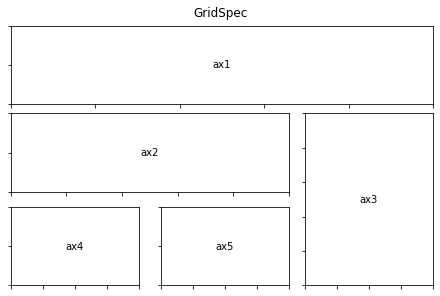

In [ ]:
from matplotlib.gridspec import GridSpec

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(layout="constrained")

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

fig.suptitle("GridSpec")
format_axes(fig)

# [Appendix] Gallary* <a class="anchor" id="11-bullet"></a>
Let's see how our senpais create these cool figures. Don't worry, you're going to be able to create figures like these very soon.

## - Basemap
(Don't touch the following cells if you have not installed basemap!)

In [ ]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap()
m.drawcoastlines()
m.drawmeridians(np.arange(0,360,60))
m.drawparallels(np.arange(-90,90,30))

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Text(0.5, 1.0, 'surface upward long radiation [W/m2]')

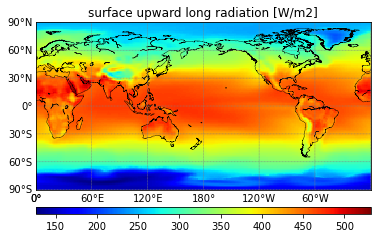

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, maskoceans

# Prepare data
nx, ny = 256, 128                                                ## the shape of the binary file
rlus = np.fromfile('rlus.bin', dtype='float64').reshape(ny,nx)   ## Read file

west, east, south, north = 0, 360, -90, 90
lons = np.linspace( west+180./nx, east-180./nx, nx)
lats = np.linspace( south+90./ny, north-90./ny, ny)
lons[lons > 180] -= 360              ## The west latitude must be negative
lons, lats = np.meshgrid(lons,lats)  ## np.meshgrid(rows,cols): convert rows & cols to 2-d array

# Show the map
m = Basemap(llcrnrlon=west, urcrnrlon=east, llcrnrlat=south, urcrnrlat=north,
            resolution='l', area_thresh=10000)   # l: low resolution (usually acceptable in global map)
                                                 # coastline or lake with an area smaller than area_thresh in km^2 will not be plotted.

m.drawcoastlines(linewidth=0.4)        # draw coastal line
m.drawmeridians(np.arange(0,360,60),linewidth=0.5,color='gray',
               dashes=[2,1],labels=[0,0,0,1])    # draw lon line (meridian)

m.drawparallels(np.arange(-90,91,30),linewidth=0.5,color='gray',
               dashes=[2,1],labels=[1,0,0,0])    # draw lat line (parallel)
                                                 # labels: list of 4 values (default [0,0,0,0]) that control whether meridians
                                                 #      are labelled where they intersect the left, right, top or bottom of the plot.
# rlus = maskoceans(lons,lats,rlus)    ## The west latitude must be negative

# Show the data
m.imshow(rlus, cmap='jet', interpolation='nearest') # rainbow color (jet)
plt.colorbar(aspect=50,pad=0.08,orientation='horizontal')
plt.title('surface upward long radiation [W/m2]')

## Hydro Hyeto Graph <a class="anchor" id="12-bullet"></a>

Text(0.5, 1.0, 'hydro hyeto graph')

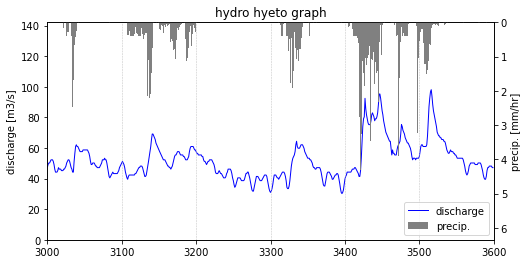

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tmax = 8760 # [hours]
dis, prcp = [],[]
for line in open('dis_2010.dat','r').readlines()[1:]:
    dis.append(float(line.strip().split()[5]))
for line in open('prcp_2010.dat','r').readlines()[1:]:
    prcp.append(float(line.strip().split()[5]))
assert len(dis) == tmax
assert len(prcp) == tmax

plt.figure(figsize=(8,4))
ax1 = plt.axes()
ax2 = ax1.twinx()

ti, tf = 3000, 3600
ax1.plot(range(ti,tf),dis[ti:tf],linewidth=1,color='b',label='discharge')
ax2.bar(range(ti,tf),prcp[ti:tf],linewidth=0,color='gray',width=1,label='precip.')

xmin,xmax,ymin1,ymax1 = ax1.axis()
xmin,xmax,ymin2,ymax2 = ax2.axis()
ax1.vlines(range(ti,tf,100),0,ymax1*1.4,
           linewidth=0.5,color='silver',linestyles='--')
ax1.set_xlim(ti,tf)
ax1.set_ylim(0,ymax1*1.4)
ax2.set_ylim(ymax2*1.4,0)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2,labels1+labels2,loc='lower right')

ax1.set_ylabel('discharge [m3/s]')
ax2.set_ylabel('precip. [mm/hr]')
plt.title('hydro hyeto graph')

## Land Cover Classification <a class="anchor" id="13-bullet"></a>

[Text(0, 0, 'N90'),
 Text(0, 30, 'N60'),
 Text(0, 60, 'N30'),
 Text(0, 90, 'NS0'),
 Text(0, 120, 'S30'),
 Text(0, 150, 'S60'),
 Text(0, 180, 'S90')]

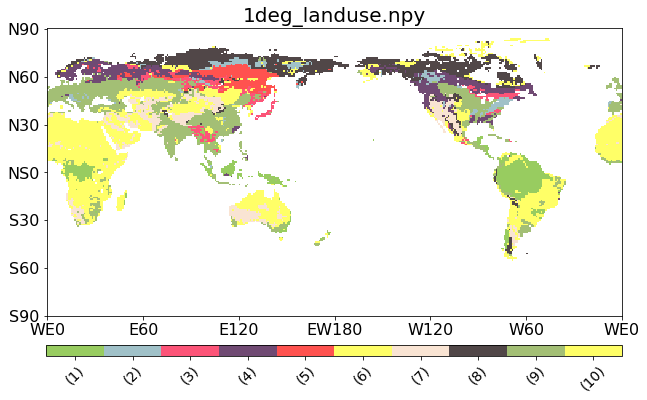

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import itertools

filename = '1deg_landuse.npy'
ctglist = [    '(1)',    '(2)',    '(3)',    '(4)',    '(5)',    '(6)',    '(7)',    '(8)',    '(9)',   '(10)']
colors  = ['#98cc60','#a0c1c8','#fc5478','#704a73','#ff524f','#ffff67','#f9e4d3','#514748','#a3bf75','#ffff67']
vmin,vmax = [2,2+len(colors)]

cm = LinearSegmentedColormap.from_list('custom_cmap', colors, N=len(colors))
aMap = np.load(filename)[::-1]
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes((0.1,0.12,0.8,0.8))
cax = fig.add_axes((0.1,0.01,0.8,0.03))
im = ax.imshow(np.where(aMap>1,aMap,np.nan), cmap=cm, interpolation='nearest', vmin=vmin, vmax = vmax)

cbar = fig.colorbar(im, cax=cax,orientation='horizontal', extend='neither', ticks= np.arange(len(colors))+2.5)
cbar.ax.set_xticklabels(ctglist,rotation=45,fontsize = 14)
ax.set_title(filename, fontsize = 20)
ax.set_xticks(range(0,361,60))
ax.set_xticklabels(["WE0","E60","E120","EW180","W120","W60","WE0"], fontsize = 16)
ax.set_yticks(range(0,181,30))
ax.set_yticklabels(["N90","N60","N30","NS0","S30","S60","S90"], fontsize = 16)